In this Notbook i will proceed to walk through the data analytics project "OTTO" step by step, according to the "Data Analytics with Python" PDF from Peter Rossbach we recieved inclass. It is used as a benchmark for the ML Process and will guid me through optimizing ans analyzing the dataset.


In [9]:
import pandas as pd

DATA_PATH = "/Users/georgiostheodoridis/Library/CloudStorage/OneDrive-fs-students.de/Semester 6/fs-classify-products/data/ClassifyProducts.csv"

def load_data(path):
    data_ori = pd.read_csv(path)
    print(f"Shape: {data_ori.shape}")
    print("\nFirst 5 rows:")
    print(data_ori.head())
    return data_ori

def describe_target(data_ori):
    print(data_ori['target'].value_counts())
    print(f"\nNumber of unique target classes: {data_ori['target'].nunique()}")

data_ori = load_data(DATA_PATH)
describe_target(data_ori)
print(data_ori.head(10))

Shape: (61878, 95)

First 5 rows:
   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        1        2        0        0        0        0   
4  ...        1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        

In [10]:
print(data_ori.head(10))

   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   
5   6       2       1       0       0       7       0       0       0       0   
6   7       2       0       0       0       0       0       0       2       0   
7   8       0       0       0       0       0       0       0       0       0   
8   9       0       0       0       0       0       0       0       4       0   
9  10       0       0       0       0       0       0       1       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0  

In [11]:
print(data_ori.isnull().sum())

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64


In [12]:
data_ori.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0
...,...,...,...,...,...,...,...,...
feat_89,61878.0,0.457772,1.527385,0.0,0.00,0.0,0.00,61.0
feat_90,61878.0,0.812421,4.597804,0.0,0.00,0.0,0.00,130.0
feat_91,61878.0,0.264941,2.045646,0.0,0.00,0.0,0.00,52.0
feat_92,61878.0,0.380119,0.982385,0.0,0.00,0.0,0.00,19.0



The method `.describe().transpose()` provides summary statistics (such as count, mean, std, min, max, and quartiles) for each column in the DataFrame. Using `.transpose()` flips the result so that each feature is shown as a row, making it easier to compare statistics across features.


In [13]:
data_ori['target'].unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

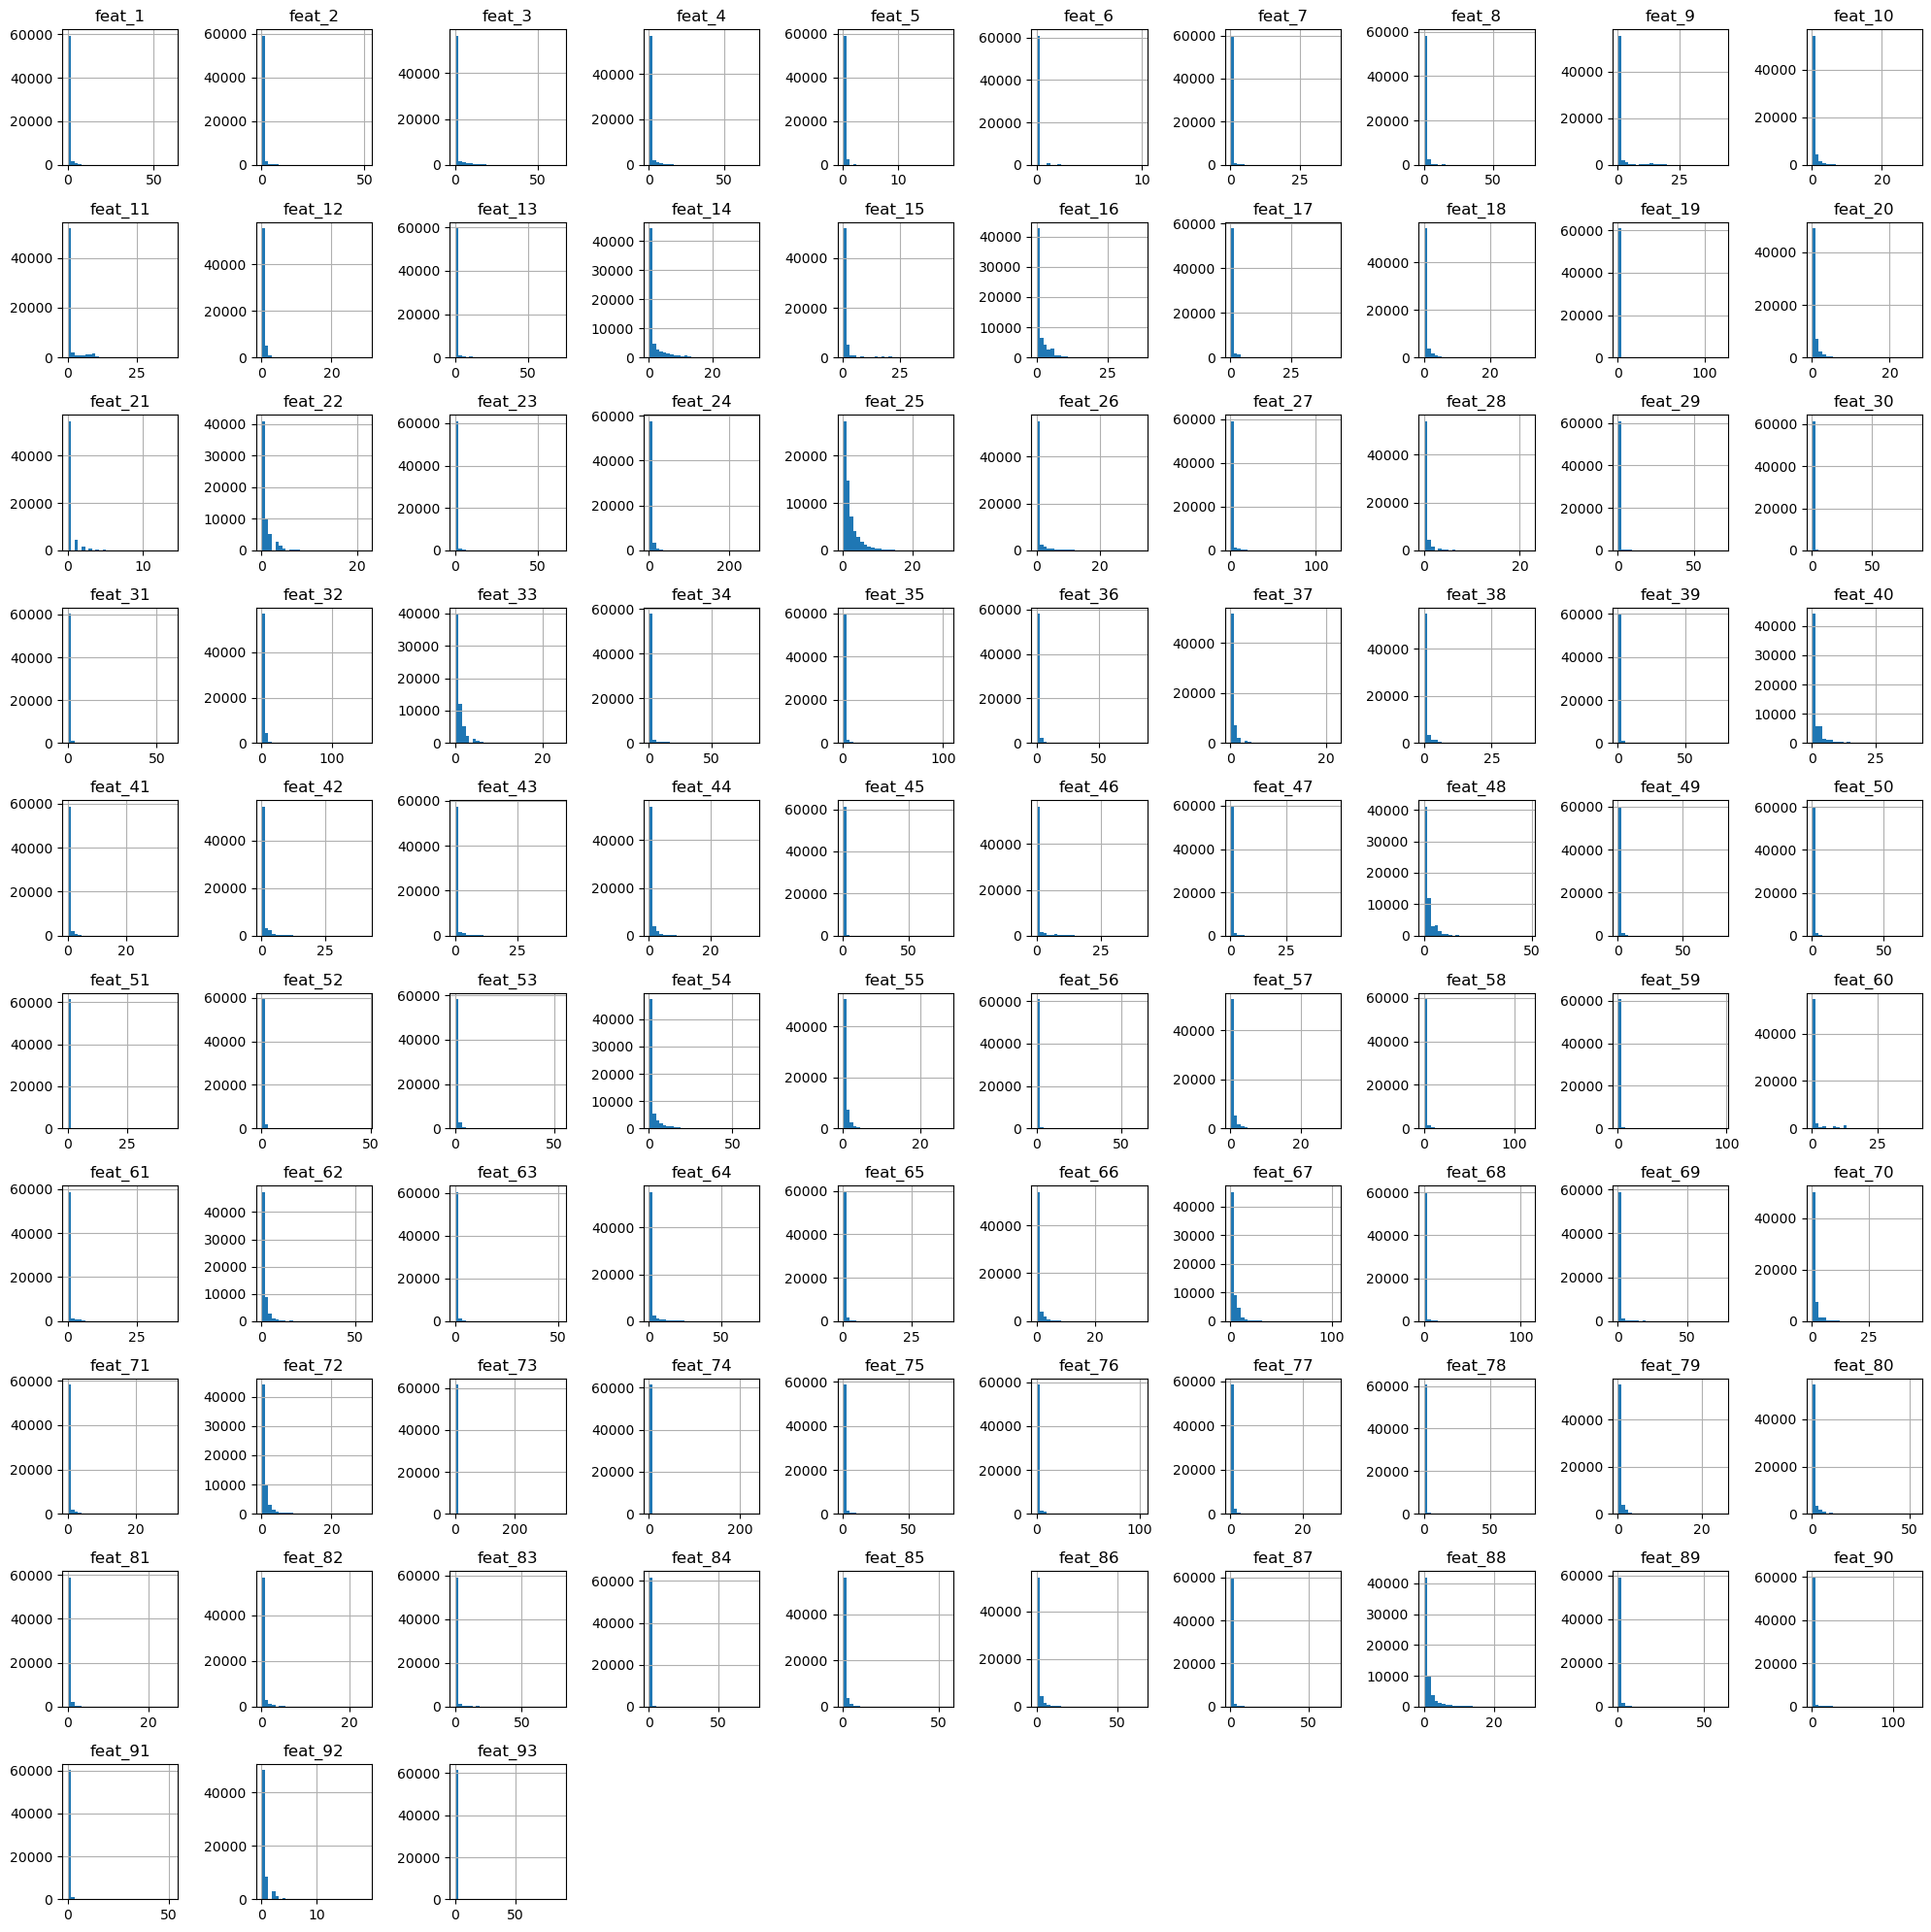

In [14]:

# Exclude the first and last columns
import matplotlib.pyplot as plt
data_excluded = data_ori.iloc[:, 1:-1]
data_excluded.hist(bins=30, figsize=(20, 20))
plt.tight_layout()
plt.show() 


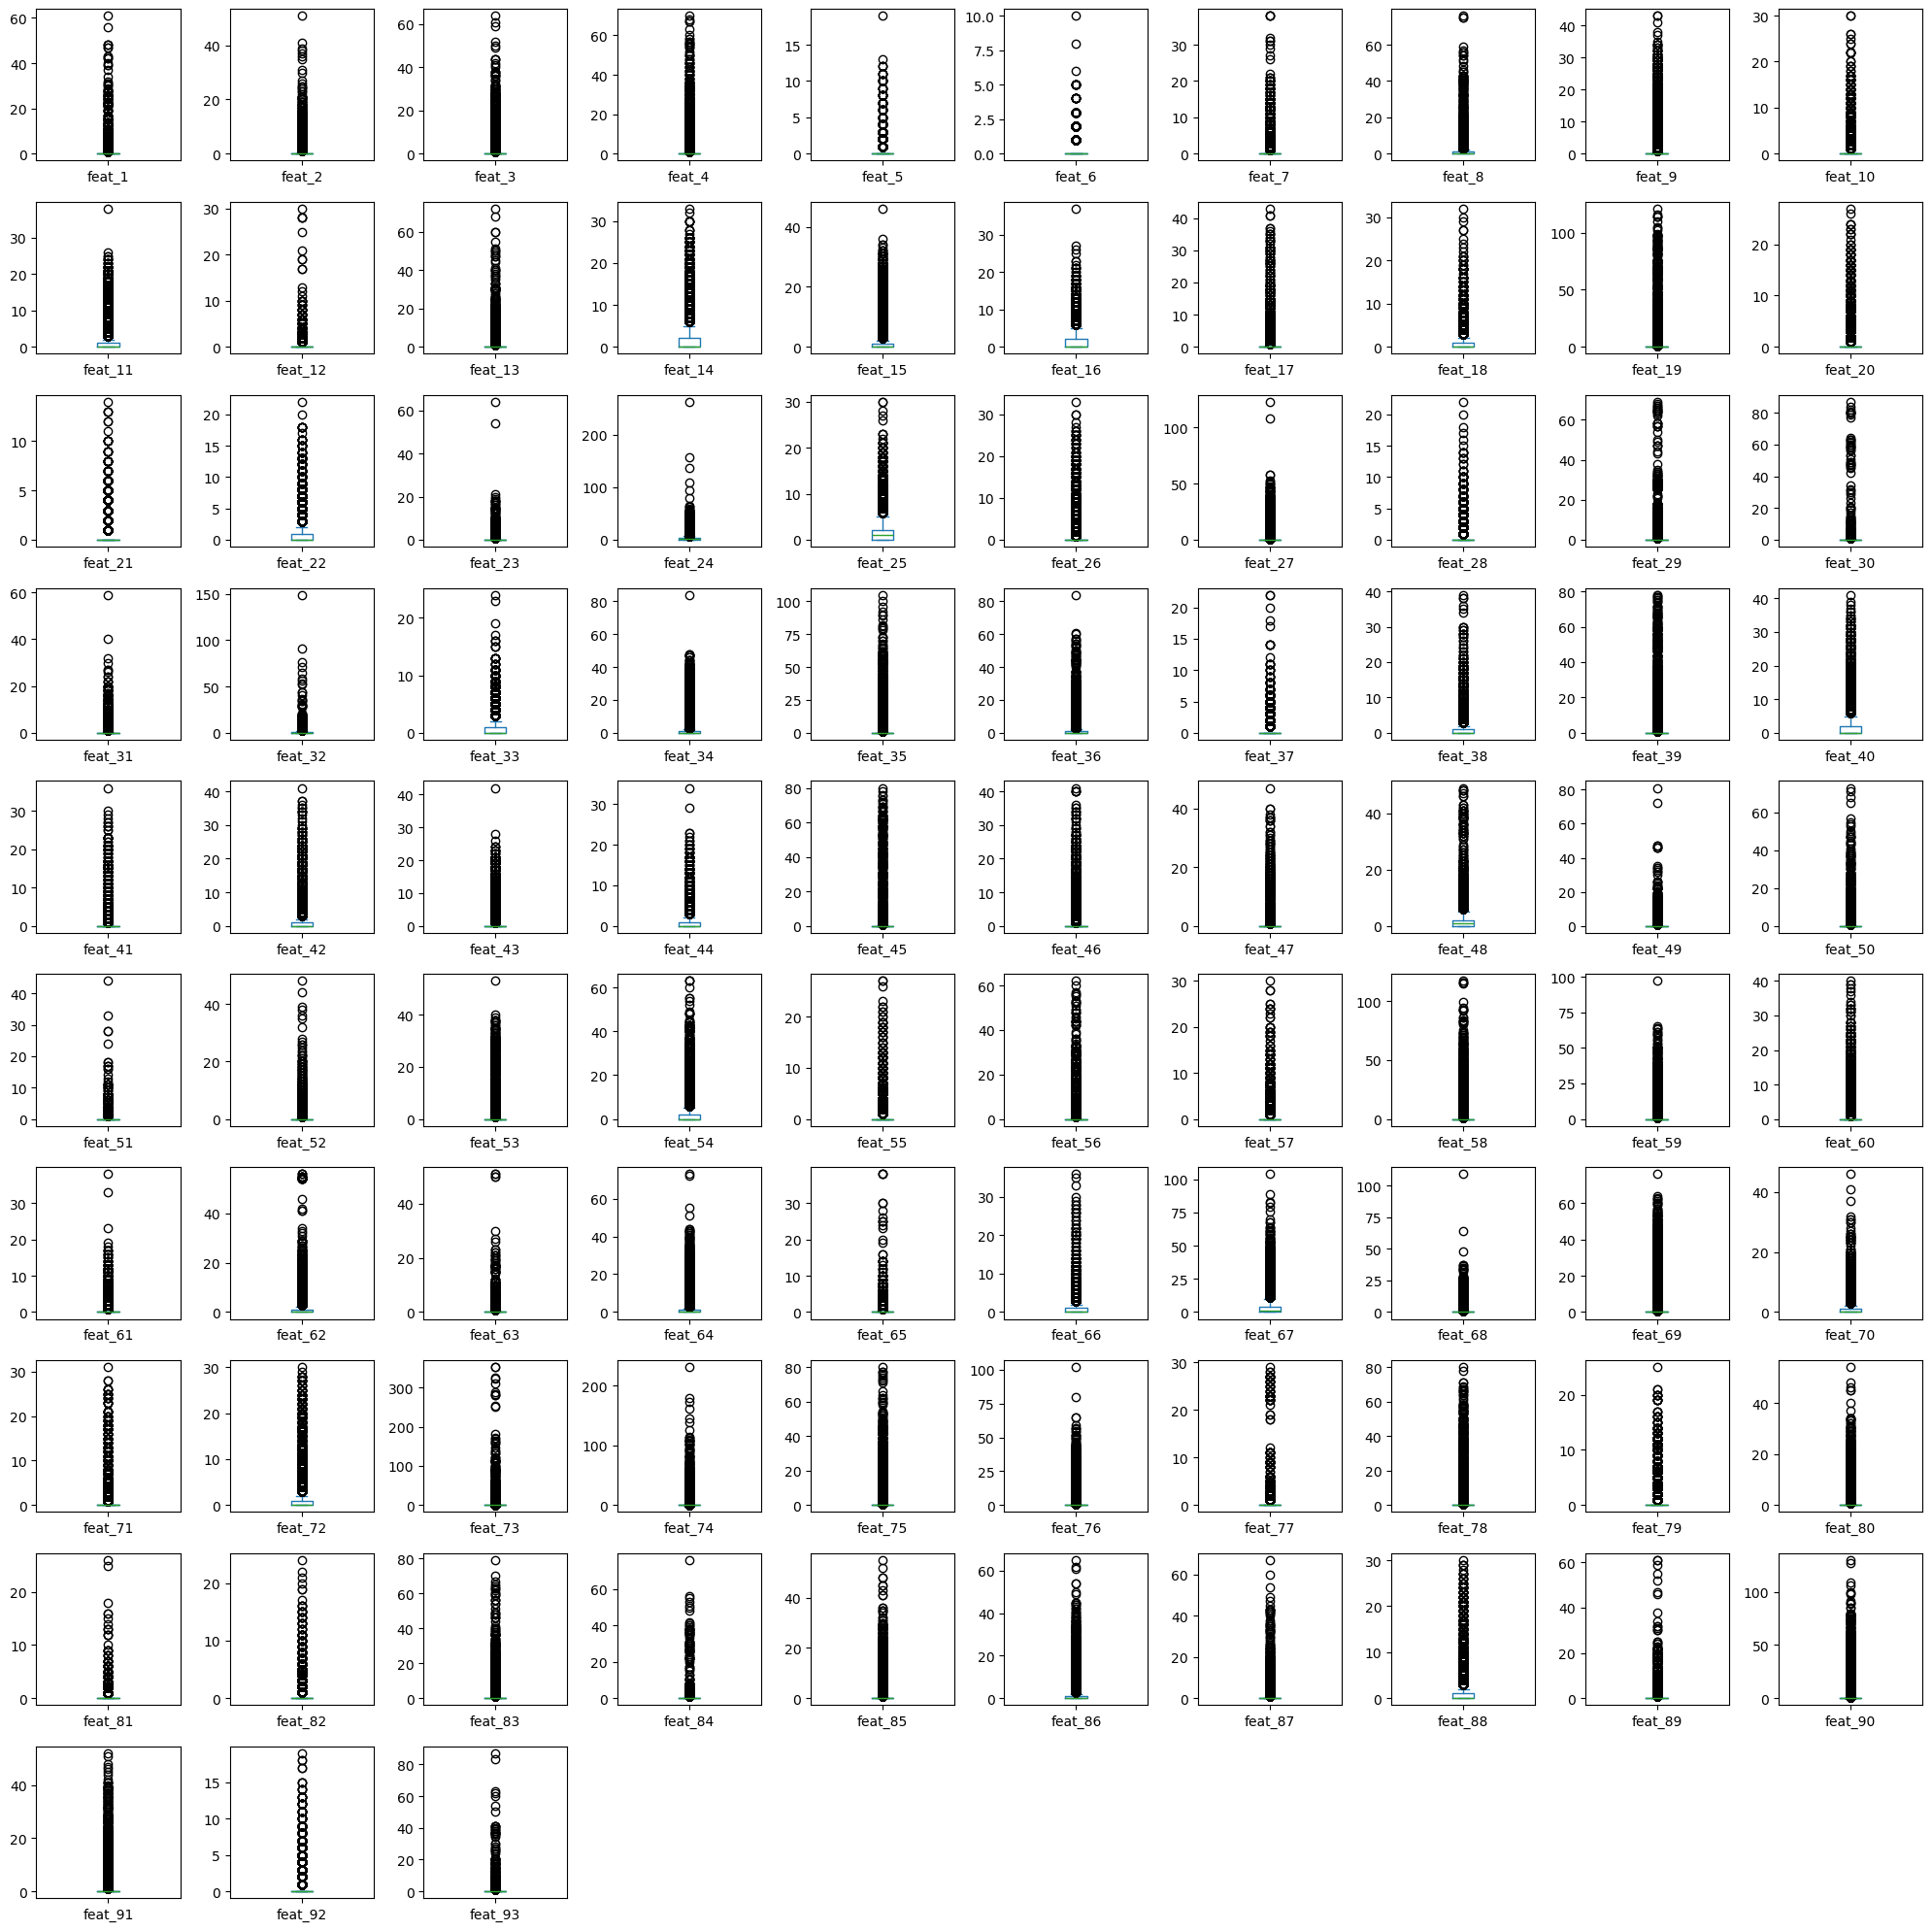

In [16]:
data_excluded.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20),sharex=False,sharey=False)
plt.tight_layout()
plt.show()


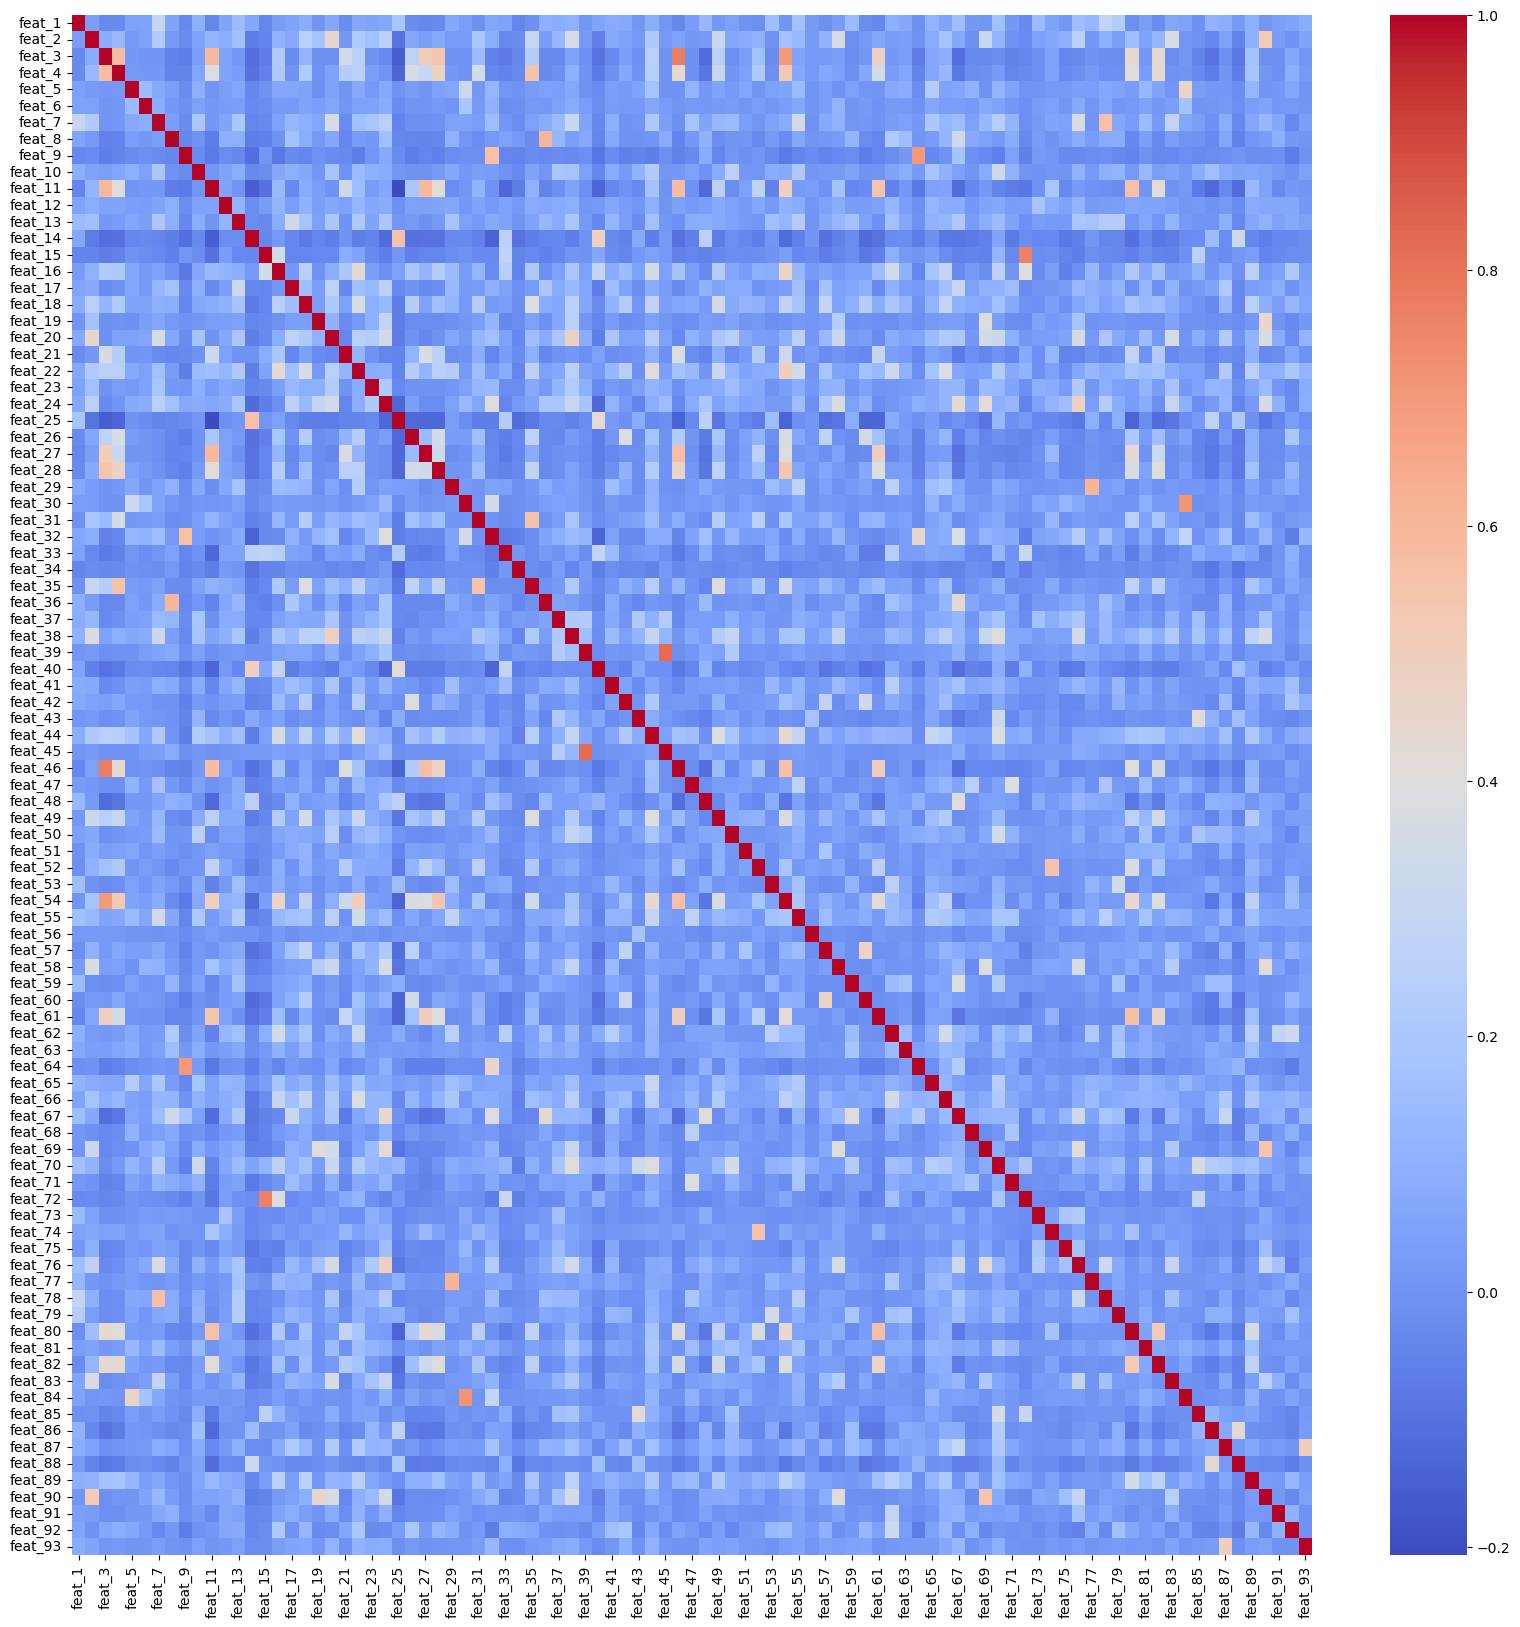

In [19]:
import seaborn as sns
# Calculate the correlation matrix for the modified dataframe
corr = data_excluded.corr()
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
plt.show()
